In [64]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Work/KiTH_Solutions/Research/Clinical Trial/study_metadata/all_performances.xlsx'
sheet = 'survey'

In [65]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/roca/figures/survey'

In [66]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()

,What_is_your_age_,What_is_your_sex_,How_difficult_was_the_paper_based_assessment_,How_difficult_was_the_software_assessment_,How_intuitive_was_the_software_assessment_compared_to_the_paper_test_,How_comfortable_were_you_navigating_through_the_software_,How_confident_do_you_feel_being_able_to_complete_the_test_on_your_own_,How_much_additional_value_do_you_see_this_assessment_bringing_to_your_medical_care_,Would_you_find_it_useful_if_you_could_take_the_test_before_your_appointment_and_talk_about_the_results_with_your_doctor_,Would_you_recommend_this_assessment_to_someone_else_,Would_being_able_to_take_this_test_remotely_help_your_care_,Would_taking_this_test_alone_alleviate_the_stress_of_being_assessed_by_a_doctor_,Would_taking_this_test_alone_alleviate_feelings_of_judgement_during_a_test_,What_changes_did_you_make_after_taking_the_test_,Would_you_trust_the_results_of_this_test_,What_impact_do_you_see_this_having_on_your_quality_of_life_,What_impact_do_you_see_this_having_on_your_quality_of_care_
0,48,Male,3.0,3.0,5.0,4,5,3,Yes,Yes,Yes,Yes,Yes,NaN,Yes,Minimal because I’ve been evaluated multiple t...,Not relevant right now due to my current cogni...
1,48,Male,3.0,3.0,5.0,4,5,3,Yes,Yes,Yes,Yes,Yes,NaN,Yes,Minimal because I’ve been evaluated multiple t...,Not relevant right now due to my current cogni...
2,27,Male,3.0,1.0,4.0,5,5,5,Yes,Yes,Yes,Yes,Yes,"Exercise, Financial Planning, Healthier diet",Yes,I can make changes to my life style to improve...,Now I know what I need to look for In my care
3,33,Female,1.0,2.0,4.0,4,4,5,Yes,Yes,Yes,Yes,Yes,Cognitive activities,Yes,A better understanding of my health and ideas ...,More confidence in having been assessed accura...
4,83,Male,2.0,3.0,3.0,3,3,4,NaN,Yes,Yes,Yes,Yes,NaN,Yes,Good to know I am OK,Not receiving care right now
5,39,Male,2.0,3.0,3.0,5,4,5,Yes,Yes,Yes,Yes,Yes,"Financial Planning, Cognitive activities",Yes,Taking the test regularly can definitely assis...,It would help health care providers better und...
6,46,Female,NaN,NaN,NaN,4,4,5,Yes,Yes,Yes,No,No,NaN,NaN,NaN,NaN
7,50,Female,3.0,1.0,5.0,5,5,5,Yes,Yes,Yes,Yes,Yes,"Exercise, Healthier diet, Cognitive activities",Yes,Depends on the situation. If someone is relian...,"If a person needs homecare, the quality of car..."
8,71,Male,4.0,4.0,4.0,5,4,2,Yes,Yes,Yes,Yes,Yes,NaN,Yes,No effect at this time,No impact at this time
9,83,Female,2.0,4.0,4.0,3,5,4,Yes,Yes,Yes,Yes,Yes,"Exercise, Cognitive activities",Yes,Being aware of dementia symtoms,Family would be more aware of what care is ava...


Create Your Own Data PRN

In [ ]:
import pandas as pd

data = {
    'Frontal Lobe': {'CSF': 0.07, 'Surface': 0.04, 'GM': 0.2, 'WM': 0.27, 'Radiologist': 0.22},
    'Parietal Lobe': {'CSF': 0.12, 'Surface': 0.03, 'GM': 0.16, 'WM': 0.22, 'Radiologist': 0.02},
    'Occipital Lobe': {'CSF': 0.28, 'Surface': 0.11, 'GM': 0.24, 'WM': 0.13, 'Radiologist': 0.22},
    'Temporal Lobe': {'CSF': 0.31, 'Surface': 0.22, 'GM': 0.26, 'WM': 0.15, 'Radiologist': 0.2},
    'Mesial Temporal Lobe': {'CSF': 0.35, 'Surface': 0.0, 'GM': 0.48, 'WM': 0.27, 'Radiologist': 0.25},
    'Cerebellum': {'CSF': 0.07, 'Surface': 0.01, 'GM': 0.21, 'WM': 0.17, 'Radiologist': -0.04},
    'Ventriculomegaly': {'CSF': 0.22, 'Surface': 0.00, 'GM': 0.05, 'WM': 0.29, 'Radiologist': 0.32},
}
df = pd.DataFrame(data)
df


In [ ]:
import pandas as pd
df = pd.read_csv(csv_path)
# df = df[df['Region'] != 'All']
# df = df.loc[:15, :]
# df = df.loc[:, ~df.columns.str.contains(' P')]
df

Simple Bar Plot

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

def plot_barplots(df, x_col, y_col, hue=None, palette="tab10"):
    ax = sns.barplot(data=df, x=x_col, y=y_col, hue=hue, palette=palette)
    return ax 
    
def plot_point_as_diamond(df, ax, point_col, palette="tab10"):
    x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
    plt.scatter(x=x_coords, y=df[point_col], color='k', marker='D', facecolors='none')
    
def plot_error_bars(df, ax, err_col, palette="tab10"):
    x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
    y_coords = [p.get_height() for p in ax.patches]
    ax.errorbar(x=x_coords, y=y_coords, yerr=df[err_col], capsize=6, fmt="none", c="k")

def show_and_save_plot(out_dir=None):
    if out_dir is not None:
        plt.savefig(os.path.join(out_dir, 'barplot.svg'))
    plt.show()

In [ ]:
# Call the plotting functions
plt.figure(figsize=(10,6))
ax = plot_barplots(df, 'Regression Method', 'Mean')
plot_error_bars(df=df, ax=ax, err_col='Std')
plot_point_as_diamond(df=df, ax=ax, point_col='Point R-squared')
show_and_save_plot(out_dir)

Create Barplot Of Methods Within Groups
- The groups to compare within are the top level keys of the dictionary. 
- The groups to compare across are the second-level keys

In [ ]:
df

In [ ]:
import pandas as pd

def melt_dataframe(df):
    # Melt the DataFrame
    melted_df = pd.melt(df, id_vars=['Method'], var_name='Variable', value_name='Accuracy')
    
    # Extract the region names from the 'Region' column
    melted_df['Region'] = melted_df['Region'].str.split(' ', expand=True)[0]
    
    return melted_df

melted_df = melt_dataframe(df)
melted_df

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


# Create the bar plot
plt.figure(figsize=(12, 6))
sns.set_palette("tab10")
sns.barplot(x='Method', y='R-Squared', hue='Method', data=melted_df)

# Customizing the plot
# plt.xlim(-0.25, 1)
plt.title('Spearman Rho Values by Region and Imaging Method')
plt.ylabel('Region')
plt.xlabel('Spearman Rho')
output_file_path = os.path.join(out_dir, 'barplot.svg')
plt.savefig(output_file_path, format='svg')
# Show the plot
plt.show()

Swap Grouping

In [ ]:
df


In [ ]:
# Transpose the data to swap grouping
df = pd.DataFrame(df).T.melt(var_name='Inference', value_name='Accuracy', ignore_index=False).reset_index()


# Generate Grouped Barplot

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
out_dir = '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/Figures/correlation_to_baseline_scores_controlled'

# Create the bar plot with swapped grouping
plt.figure(figsize=(12, 6))
sns.set_palette("tab10")
sns.barplot(x='Region', y='R-Squared', hue='Method', data=melted_df)

# Customizing the plot
# plt.ylim(-0.3, 0.8)  # Adjust the y-axis limits as needed
plt.title('Agreement With Radiologist')
plt.xlabel('Method')
plt.ylabel('Correlation to Neuroradiologist (Spearman Rho)')

# Save the plot as an SVG file
output_file_path = os.path.join(out_dir, 'barplot.svg')
# plt.savefig(output_file_path, format='svg')

# Show the plot (optional)
plt.show()


# Generate Boxplot

In [ ]:
# df.drop(13, inplace=True)
# df.drop(17, inplace=True)
# df.drop(14, inplace=True)


In [ ]:
# df = pd.DataFrame(df).T.melt(var_name='Imaging Method', value_name='R-Squared', ignore_index=False).reset_index()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
# Create the bar plot with swapped grouping
plt.figure(figsize=(12, 6))
sns.set_palette("tab10")
sns.boxplot(x='Inference', y='Accuracy', data=df)

# Customizing the plot
# plt.ylim(-0.3, 0.8)  # Adjust the y-axis limits as needed
plt.title('Accuracy by Method')
plt.xlabel('')
plt.ylabel('Accuracy')

# Save the plot as an SVG file
out_dir= '/Users/cu135/Dropbox (Partners HealthCare)/studies/review_pyper/figures/mansucript_figures/100_manuscript_questions'
output_file_path = os.path.join(out_dir, 'boxplot_v2.svg')
plt.savefig(output_file_path, format='svg')
# Show the plot (optional)
plt.show()

In [ ]:
from scipy import stats

# Grouping data by 'Inference' and applying the test
kruskal_test_result = stats.kruskal(*[group["Accuracy"].values for name, group in df.groupby("Inference")])

# Output the test statistic and the p-value
print("Kruskal-Wallis Test statistic:", kruskal_test_result.statistic)
print("P-value:", kruskal_test_result.pvalue)

# Assess the p-value to determine the outcome of the hypothesis test
if kruskal_test_result.pvalue < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("There is no statistically significant difference between groups.")

# Stacked barplot

In [ ]:
data_df.columns

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

def plot_stacked_barplots(df, columns, out_dir):
    # Create a DataFrame to hold the counts for each response category for each question
    response_categories = df[columns].apply(pd.Series.value_counts).fillna(0).T

    # Normalize the counts to be on a scale of 0-1
    response_categories = response_categories.div(response_categories.sum(axis=1), axis=0)
    
    # Ensure consistent coloring using tab10
    cmap = plt.get_cmap('tab10')
    unique_responses = response_categories.columns
    colors = {response: cmap(i) for i, response in enumerate(unique_responses)}

    # Plotting the stacked bar plot
    ax = response_categories.plot(kind='bar', stacked=True, figsize=(20, 20), color=[colors[response] for response in unique_responses])

    # Annotating the plot with the normalized values
    for i in range(len(response_categories)):
        cumulative_sum = np.zeros(len(response_categories.columns))
        for j, response in enumerate(response_categories.columns):
            height = response_categories.iloc[i, j]
            cumulative_sum[j] = cumulative_sum[j-1] + height if j > 0 else height
            ax.text(i, cumulative_sum[j] - height / 2, f'{height:.2f}', ha='center', va='center', fontsize=12, color='black')

    # Customizing the plot
    plt.title('Normalized Stacked Bar Plot of Responses', fontsize=20)
    plt.ylabel('Proportion of Responses', fontsize=16)
    plt.legend(title='Responses', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
    plt.xticks(range(len(columns)), [col.replace('_', ' ') for col in columns], rotation=45, ha='right', fontsize=16)
    plt.yticks(fontsize=16)
    sns.despine()
    plt.tight_layout()
    
    if out_dir is not None:
        plt.savefig(os.path.join(out_dir, 'stacked_barplot.svg'))
    
    plt.show()

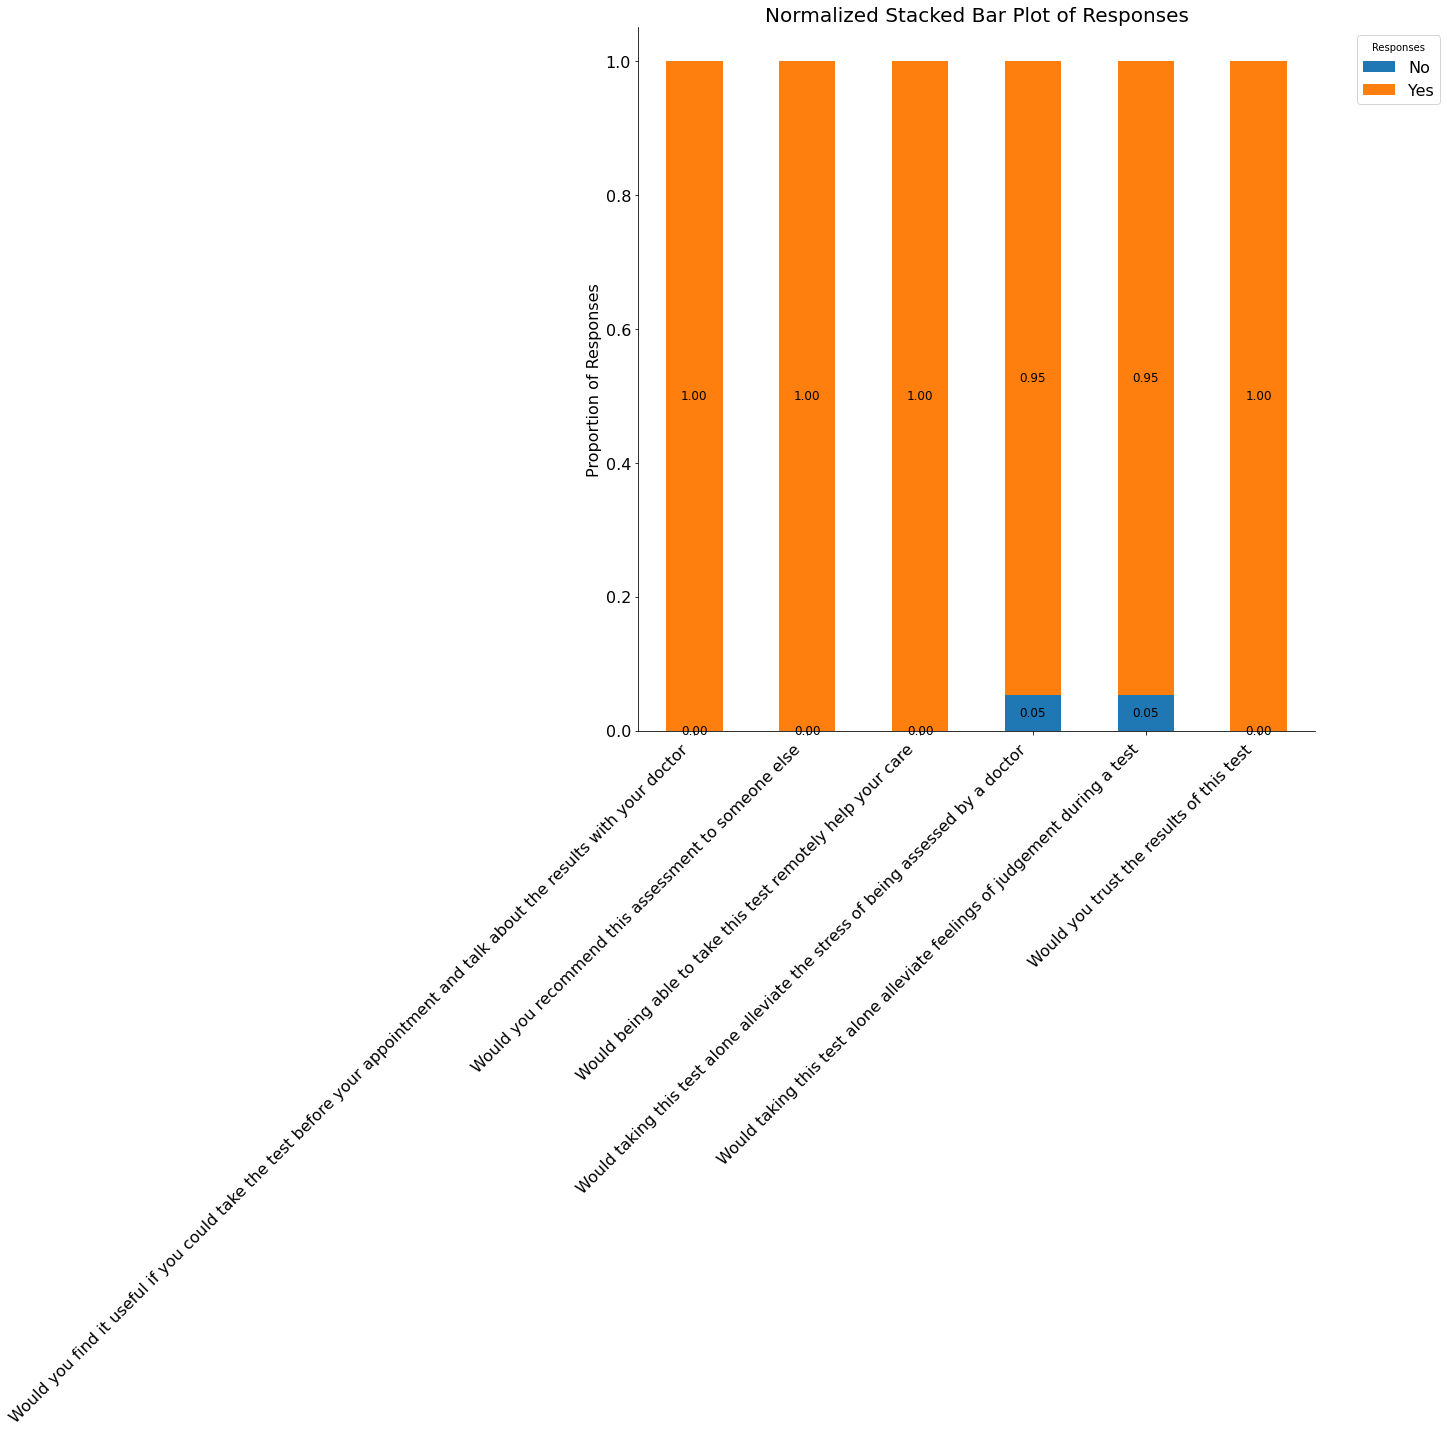

In [69]:
# Likert Questions:
# columns_to_plot = [
#     'How_intuitive_was_the_software_assessment_compared_to_the_paper_test_',
#     'How_comfortable_were_you_navigating_through_the_software_',
#     'How_confident_do_you_feel_being_able_to_complete_the_test_on_your_own_',
#     'How_much_additional_value_do_you_see_this_assessment_bringing_to_your_medical_care_'
# ]
# Yes/No Questions:
columns_to_plot = [
    'Would_you_find_it_useful_if_you_could_take_the_test_before_your_appointment_and_talk_about_the_results_with_your_doctor_',
       'Would_you_recommend_this_assessment_to_someone_else_',
       'Would_being_able_to_take_this_test_remotely_help_your_care_',
       'Would_taking_this_test_alone_alleviate_the_stress_of_being_assessed_by_a_doctor_',
       'Would_taking_this_test_alone_alleviate_feelings_of_judgement_during_a_test_',
        'Would_you_trust_the_results_of_this_test_'
]
# Assuming 'df' is your DataFrame
plot_stacked_barplots(data_df, columns_to_plot, out_dir)


# 05 - Scatterplot a Value to a Classification